# Lab Session #1
## Computational Neurophysiology [E010620A]
### Dept of Electronics and Informatics (VUB) and Dept of Information Technology (UGent)
Jorne Laton, Lloyd Plumart, Talis Vertriest, Jeroen Van Schependom, Sarah Verhulst

<font color=blue>Student names and IDs:</font> 
César Zapata - 02213600, 
<br>
<font color=blue>Academic Year:</font> 2022-2023

### General Introduction
In all the practical sessions of this course we will use python 3 and jupyter notebooks. Install Anaconda on your computer and open jupyter notebook by typing "jupyter notebook" or "jupyter lab" in the command line. Your browser will open a file explorer, from where you can navigate to the exercise.

The lab sessions consist of a jupyter notebook in which the different steps are described and explained, together with the tasks you are asked to complete.

You will form groups of two and submit one report per group. Reports should be formatted according to the guiding document. Make sure your answers stand out in the final submitted document!

Deadline: 2 weeks after lecture. Reports submitted after the deadline will not be graded.

### Context and Goals
This lab session is focused on the Hodgkin-Huxley (HH) model, following and reproducing the theoretical chapter that can be found here: https://neuronaldynamics.epfl.ch/online/Ch2.S2.html. You will be asked to complete code scripts, make observations and explain the results of the different simulations, and contextualise the analyses with the HH model theoretical background.


# Questions
## Part 1: Hodgkin-Huxley model equations
### Q1.1 HH equations <a id="Q1.1"/>
We are coding the HH equations by a single or by multiple functions, to reproduce the behaviour of a human pyramidal neuron when excited. This will be the function to be made to perform the HH model is the following: 

`
m, h, n, V, INa, IK, alpha_m, alpha_n, alpha_h, beta_m, beta_n, beta_h = HH_model(T, I_input, dt)
`

The inputs are:
1. `T` -> Time window of simulation [ms]
2. `I_input` -> input current [µA]
3. `dt` -> the rate of update [ms]

The outputs are: 
1. `V` -> the voltage of neuron [mV]
2. `m` -> activation variable for Na-current [u/cm^2]
3. `h` -> inactivation variable for Na-current [u/cm^2]
4. `n` -> activation variable for K-current [u/cm^2]
5. `t` -> the time axis of the simulation (useful for plotting) [ms]
6. `I_Na` -> Na current [µA/cm^2]
7. `I_K` -> K current [µA/cm^2]
8. `alpha_m, beta_m, alpha_n, beta_n, alpha_h, beta_h` -> gating parameters [1/ms]

You can use the functions that are already provided to retrieve some parameters. To complete the code, you can find the equations and parameter values in https://neuronaldynamics.epfl.ch/online/Ch2.S2.html.

Q1.1a Implement the update equations of the gating variables m, n and h as described in Table 2.1 of the online version of the book and reproduce Figure 2.3.

Q1.1b Make the plots and describe in your own words what you have plotted.

Q1.1c Unfortunately, when simulating the HH model with these parameters, you will not get a K-current. Please adjust (u-25) by (u+25) in the update equations for gating variable $n$.

* [Import these modules](#P1_imports)

* [Fill in answers here](#A1.1)

### Q1.2 Simulate the response to an impulse current <a id="Q1.2"/>
To try out whether the designed functions work, design a step function (A1.2a) that can be used to model the current input (A1.2b). Consider the following design parameters:

1. `I_input function` -> step function 
2. `T` -> time of simulation: 100 ms
3. `dt` -> update time: 0.01 ms
4. Current impulse `I_input`: 20 µA between 1 and 2 ms.

* [Fill in answers here](#A1.2)

### Q1.3. Plot V(t) <a id="Q1.3"/>
Plot the first 20 ms of $V(t)$.

Describe the dynamics of the neural voltage $V$.
Does it make sense?

* [Fill in answers here](#A1.3)

### Q1.4 Plot the model parameters <a id="Q1.4"/>
Plot the model parameters n, m and h in function of t and again limit the plots to the first 20 ms. Describe the dynamics of the model parameters m, n, and h. Does it make sense? Describe how the gates swing open and closed during the dynamics of a spike.
* [Fill in answers here](#A1.4)

### Q1.5. Plot I_Na and I_K <a id="Q1.5"/>
Plot I_Na and I_K in function of t (again only the first 20 ms).

Describe the dynamics of the currents. Does it make sense? Describe the currents flows during a spike.

* [Fill in answers here](#A1.5)

### Q1.6. Plot the conductances g_Na and g_K <a id="Q1.6"/>
Plot the conductances g_Na, g_K in function of t (again only the first 20 ms).

How are the conductances evolving during a spike?

* [Fill in answers here](#A1.6)

## Part 2: Package BRIAN

In the second part of the practical, you are going to use the Brian library to simulate the dynamics of a squid neuron when excited. To learn more about this module, read this paper: https://pubmed.ncbi.nlm.nih.gov/19115011/ . 
Before starting, the Brian module must be installed, together with the neurodynex3 module. Open the anaconda prompt, and install the brian2 package:

`conda install -c conda-forge brian2`

and then the neurodynex3 package:

`pip install neurodynex3`

### Note
If you are working on Linux or one of the newest mac OS systems, you might check whether your pip command is actually pip3.  

After installing, the packages are ready to use! If you need more information about the modules, you can find it here https://briansimulator.org/.

* [Import these modules](#P2_imports)

### Q2.1 Step current response <a id="Q2.1"/>
We study the response of a Hodgkin-Huxley squid neuron to different input currents. 

Have a look at the documentation of the functions `HH.simulate_HH_neuron()` and `HH.plot_data()` and the module `neurodynex3.tools.input_factory`.

By using the mentioned functions, code the following steps: 
1. Step function for the input current 
2. Run the HH simulation (for 300ms)
3. Plot the results of this simulation 

Vary the amplitude of the input current between 0.1 and 50 µA between 50 and 250ms.
Describe the different dynamics of the spiking neuron. 

What is the lowest step current amplitude to generate a spike or to generate repetitive firing?
Discuss the difference between the two regimes.

* [Fill in answer here](#A2.1)

### Q2.2 Slow and fast ramp current
The minimal current to elicit a spike does not just depend on the amplitude I or on the total charge Q of the current, but on the “shape” of the current. Let’s investigate why.

#### Q2.2.1 Slow ramp current <a id="Q2.2.1"/>
Inject a slow ramp current into a HH neuron. The current is 0 µA at t = 0 and starts at 5 ms, linearly increasing to an amplitude of 14.0 µA at t = t_ramp_end. At t > t_ramp_end, the current is set back to 0 µA. 
A slow ramp duration could be between 30-100 ms.

Experiment with different t_ramp_end values to discover the maximal duration of a ramp, such that the neuron does not spike. Make sure you simulate for at least 20ms after t_ramp_end.

Q2.2.1a Use the function `HH.plot_data()` to visualize the dynamics of the system.

Q2.2.1b What is the membrane voltage at the time when the current injection stops (t=slow_ramp_t_end)?

* [Fill in answers here](#A2.2.1)

#### Q2.2.2 Fast ramp current <a id="Q2.2.2"/>
Q2.2.2a Do the same as before but this time for a fast ramp current. Start the linearly increasing input current again at t = 5 ms. The amplitude at t = t_ramp_end is 5.0 µA. Start with a duration of 5 ms and then increase the ramp duration it until no spike occurs.
Use the function `HH.plot_data()` to visualize the dynamics of the system.

Q2.2.2b What is the membrane voltage at the time when the current injection stops (t=slow_ramp_t_end)?

* [Fill in answers here](#A2.2.2)

#### Q2.2.3. Differences <a id="Q2.2.3"/>
Discuss the differences between the two situations. Why are the two “threshold” voltages different? Link your observation to the gating variables m, n and h.

Hint: have a look at Chapter 2, Figure 2.3.

* [Fill in answers here](#A2.2.3)

### Q2.3 Rebound Spike <a id="Q2.3"/>
A HH neuron can spike not only if it receives a sufficiently strong depolarizing input current but also after a hyperpolarizing current. Such a spike is called a rebound spike.

Inject a hyperpolarizing step current I_input = -1 µA for a duration of 25 ms into the HH neuron. Simulate the neuron for 50 ms and plot the voltage trace and the gating variables. Repeat the simulation with I_input = -5 µA. What is happening here? To which gating variable do you attribute this rebound spike?

It may be difficult to to see which gating parameter is responsible for depolarisation (and a possible consequent rebound spike) after a negative current injection. Therefore, also plot the real ratio of n and m, together with the effect of h and use this plot to answer the above question.

* [Fill in answers here](#A2.3)

# Answers

## Part 1: Hodgkin-Huxley model equations

### Imports <a id="P1_imports"/>

In [11]:
# Import and add all the libraries you need throughout the code

import math
import numpy as np
import matplotlib.pyplot as plt

# Make your graphs colorblind-friendly
plt.style.use('tableau-colorblind10')

### A1.1: HH Equations <a id="A1.1"/>
* [Go back to Q1.1](#Q1.1) 

In [84]:
# A1.1a Enter your code at the bottom of this cell

# Use the following variable names:

#T = 100 #ms. Given        D
#I_input                   D
#dt # given                D
#alpha_m                   D
#beta_m                    D
#alpha_n                   D
#beta_n                    D
#alpha_h                   D
#beta_h                    D
#m                         D
#h                         D
#n                         D
#V                         D
#t                         D
#I_Na                      D
#I_K                       D
#I_L                       D

# Hints:
# Reversal potentials have unit mV
# Constant conductances have unit mS/cm2
    
# Hint: complete the following functions:


def gating_variable_m(u):
    beta_m = (-0.124 * (u+35)) / (1 - math.e ** ( (u+35) / 9) )
    alpha_m = (0.182 * (u+35)) / (1 - math.e ** (-(u+35) / 9) )
    
    return alpha_m,beta_m


def gating_variable_n(u):
    beta_n = (-0.002 * (u-25)) / (1 - math.e ** ( (u-25) / 9) )
    alpha_n = (0.02 * (u-25)) / (1 - math.e ** (-(u-25) / 9) )
    
    return alpha_n, beta_n


def gating_variable_h(u):
    beta_h = 0.25 * (math.e ** ((u+62) / 6)) / ((math.e ** (u+90)) / 12)
    alpha_h = 0.25 * (math.e ** (-(u+90) / 12) )
    
    return alpha_h, beta_h


def HH_model(T, I_input, dt):
    
    u = [-65] #(mV) -> membrane resting potential
    t = np.arange(0, T, dt)  # time axis of the simulation
    
    
    # Table 2.1 in the document. Parameters for conductance and reverse potentials
    g_Na = 40 #(ms/cm2)
    E_Na = 55 #(mV)    
    g_K = 35 #(ms/cm2)
    E_K = -77 #(mV)
    g_L = 0.3 #(ms/cm2)
    E_L = -65 #(mV)
    C_m = 1 #(uF/cm2)
    
    # values to plot later
    m = []
    n = []
    h = []
    V = []
    tau_m = []
    tau_n = []
    tau_h = []
    I_c = []

    for i in range(len(t)):

        if not i:
            # gating vatiables for m
            alpha_m, beta_m = gating_variable_m(u[0])
            
            # gating vatiables for n
            alpha_n, beta_n = gating_variable_n(u[0])
            
            # gating vatiables for h
            alpha_h, beta_h = gating_variable_h(u[0])
            
            
            # Under equation 2.9 in the document. Equations for x_0
            m_0 = (alpha_m) / (alpha_m + beta_m)
            n_0 = (alpha_n) / (alpha_n + beta_n)
            h_0 = (alpha_h) / (alpha_h + beta_h)


            # Equations 2.7 and 2.8. Values for m, n, h
            m.append(m_0)
            n.append(n_0)
            h.append(h_0)
            
        
            # Equation 2.5. Current values for Na, K, and leak
            I_Na = (g_Na * (m[0]**3) * h[0] * (u[0] - E_Na))
            I_K = (g_K * (n[0]**4) * (u[0] - E_K))
            I_L = (g_L * (u[0] - E_L))
            sum_I = I_Na + I_K + I_L

                
            # I(t) = I_c + I_ions -> sum of Ions' I
            I_c.append(I_input - sum_I)

            # du_dt = (u1 - u0) / dt
            V.append((dt * I_c[0]) + u[0])
            u += V # updating u for every step
    
    
        else:
            if i > 2: I_input = 0
            
            # gating vatiables for m
            alpha_m, beta_m = gating_variable_m(u[-1])
            
            # gating vatiables for n
            alpha_n, beta_n = gating_variable_n(u[-1])
            
            # gating vatiables for h
            alpha_h, beta_h = gating_variable_h(u[-1])
            
            
            # Under equation 2.9 in the document. Equations for x_0
            m_0 = (alpha_m) / (alpha_m + beta_m)
            n_0 = (alpha_n) / (alpha_n + beta_n)
            h_0 = (alpha_h) / (alpha_h + beta_h)
            
            
            # Under equation 2.9 in the document. Equations for tau_x
            tau_m.append(1 / (alpha_m + beta_m))
            tau_n.append(1 / (alpha_n + beta_n))
            tau_h.append(1 / (alpha_h + beta_h))


            # Equations 2.7 and 2.8. Values for m, n, h
            m.append( m[-1] + (m_0 - m[-1]) * (math.e ** ( -(t[i] - t[i-1]) / (tau_m[-1]) )) )
            n.append( n[-1] + (n_0 - n[-1]) * (math.e ** ( -(t[i] - t[i-1]) / (tau_n[-1]) )) )
            h.append( h[-1] + (h_0 - h[-1]) * (math.e ** ( -(t[i] - t[i-1]) / (tau_h[-1]) )) )
            

            # d_m = -(1 / (tau_m)) * (m - m_0)
            # d_n = -(1 / (tau_n)) * (n - n_0)
            # d_h = -(1 / (tau_h)) * (h - h_0)


            # Equation 2.5. Current values for Na, K, and leak
            I_Na = (g_Na * (m[-1]**3) * h[-1] * (u[-1] - E_Na))
            I_K = (g_K * (n[-1]**4) * (u[-1] - E_K))
            I_L = (g_L * (u[-1] - E_L))
            sum_I = I_Na + I_K + I_L

                
            # I(t) = I_c + I_ions -> sum of Ions' I
            I_c.append(I_input - sum_I)


            # du_dt = (u1 - u0) / dt
            V.append((dt * I_c[-1]) + u[-1])
            u = V # updating u for every step
        
    return m, h, n, V, t, I_Na, I_K, I_L, alpha_m, alpha_n, alpha_h, beta_m, beta_n, beta_h, tau_n, tau_m, tau_h
                             
        
##################################
##   A1.1a solutions functions   ##
##################################

m, h, n, V, t, I_Na, I_K, I_L, alpha_m, alpha_n, alpha_h, beta_m, beta_n, beta_h, tau_n, tau_m, tau_h = HH_model(100, 0.02, 0.001)


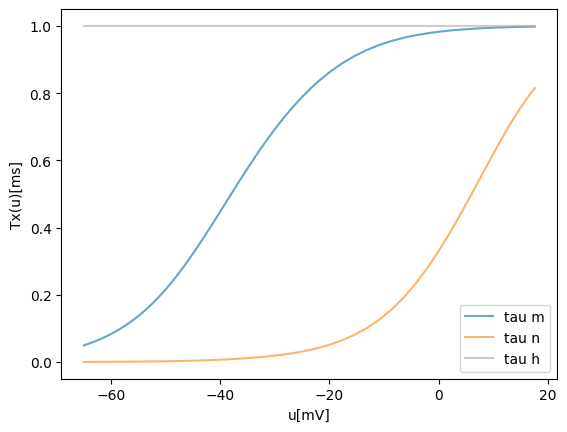

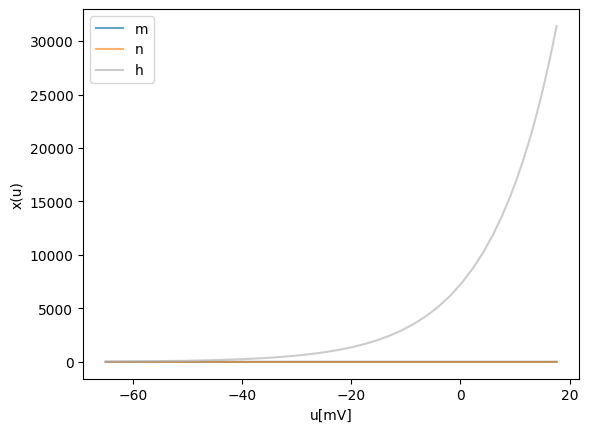

In [85]:
# A1.1b Plot your graph below

# Hint: the first graph plots rate constants (n, m and h in function of membrane voltage)
# Hint: the second graph plots the voltage dependent time constants (tau_n, tau_m and tau_h in function of membrane voltage)


plt.figure(1)
plt.plot(V, m, alpha=0.6, label="tau m")
plt.plot(V, n, alpha=0.6, label="tau n")
plt.plot(V, h, alpha=0.6, label="tau h")
plt.xlabel("u[mV]")
plt.ylabel("Tx(u)[ms]")
plt.legend()
plt.show()


plt.figure(2)
plt.plot(V[:-1], tau_n, alpha=0.6, label="m")
plt.plot(V[:-1], tau_m, alpha=0.6, label="n")
plt.plot(V[:-1], tau_h, alpha=0.6, label="h")
plt.xlabel("u[mV]")
plt.ylabel("x(u)")
plt.legend()
plt.show()

# What is your conclusion?

##############################
##   A1.1b plots   ##
##############################
    

#########################
##   A1.1b conclusion   ##
#########################

# Answer in green box below


<div class="alert alert-success">
<span style="color:black">
    
**A1.1b conclusion** 

    
Your answer here


</span>

In [4]:
# A1.1c Enter the updated HH model here

########################################
##   A1.1c updated HH model solution   ##
########################################
                       


### A1.2: Response simulation <a id="A1.2"/>
* [Go back to Q1.2](#Q1.2) 

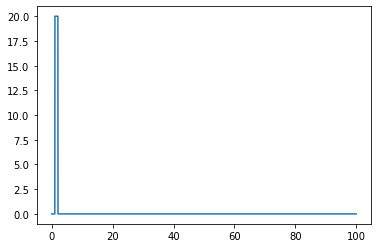

In [14]:
# A1.2a Set up and plot your input current

######################################
##   A1.2a solutions input current   ##
######################################
t = np.arange(0, 100, 0.01)
I_input = [0 if x < 1 or x > 2 else 20 for x in t]

In [6]:
# A1.2b Insert the input current into your HH_model function

#######################################
##   A1.2b insert input in HH_model   ##
#######################################


### A1.3: Plot V(t) <a id="A1.3"/>
* [Go back to Q1.3](#Q1.3) 

In [7]:
# A1.3a Enter your answer below

###########################
##   A1.3a solution plot  ##
###########################



In [8]:
# A1.3b Enter your interpretation and conclusion below

#########################
##   A1.3b conclusion   ##
#########################

# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A1.3b conclusion** 

    
Your answer here

    
</span>

### A1.4: Plot the model parameters <a id="A1.4"/>
* [Go back to Q1.4](#Q1.4) 

In [9]:
# A1.4a Plot your graph below

############################
##   A1.4a solution plot   ##
############################



In [10]:
# A1.4b Enter your interpretation and conclusion answer below

#########################
##   A1.4b conclusion   ##
#########################

# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A1.4b conclusion** 
    
    
Your answer here

    
</span>

### A1.5: Plot I_Na and I_K <a id="A1.5"/>
* [Go back to Q1.5](#Q1.5)

In [11]:
# A1.5a Plot your graph here

############################
##   A1.5a plot   ##
############################


In [12]:
# A1.5b Enter your interpretation and conclusion

#########################
##   A1.5b conclusion   ##
#########################

# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A1.5b conclusion** 
    
    
Your answer here

    
</span>

### A1.6: Plot the conductances g_Na and g_K <a id="A1.6"/>
* [Go back to Q1.6](#Q1.6) 

In [13]:
# A1.6a Enter your code and plot

###########################
##   A1.6a solution plot  ##
###########################


In [14]:
# A1.6b Enter your interpretation and conclusion

#########################
##   A1.6b conclusion   ##
#########################

# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A1.6b conclusion** 
    
    
Your answer here

    
</span>

## Part 2: Package BRIAN

### Import <a id="P2_imports"/>

In [2]:
# The new libraries we need to add

%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory


### A2.1 Step current response <a id="A2.1"/>
* [Go back to Q2.1](#Q2.1) 

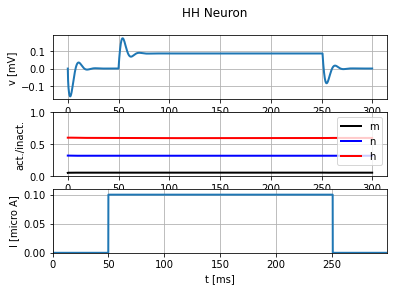

In [6]:
# A2.1a Enter your answer below

# Hint: The unit of the I_input current in the neurodynex3.hodgkin_huxley module is µA (coded b2.uA)

########################
##   Q2.1. solution   ##
########################

I_input = input_factory.get_step_current(50, 250, b2.ms, 0.1 * b2.uA, 50 * b2.uA)
state_monitor = HH.simulate_HH_neuron(I_input, 300 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron")

In [17]:
# Enter your conclusion and interpretation

##########################
##   Q2.1. conclusion   ##
##########################


# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A2.1 conclusion** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
    
</span>

### A2.2.1 Slow ramp current <a id="A2.2.1"/>
* [Go back to Q2.2.1](#Q2.2.1) 

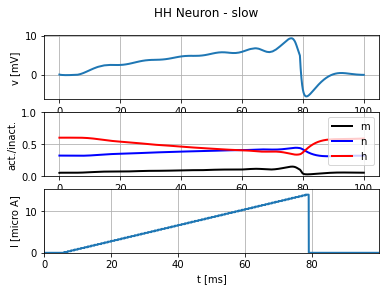

voltage_slow=0.007214642935639053


In [44]:
# Enter your code below

#########################
##   Q2.2.1a solution   ##
#########################

b2.defaultclock.dt = 0.02*b2.ms
slow_ramp_t_end = 78  # no spike. make it shorter
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 14.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 100 * b2.ms)
idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt))
voltage_slow = state_monitor.vm[0,idx_t_end]
HH.plot_data(state_monitor, title="HH Neuron - slow")
print(f"voltage_slow={voltage_slow}")

In [19]:
###########################
##   Q2.2.1a conclusion   ##
###########################


# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A2.2.1a conclusion** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
    
</span>

In [20]:
# Enter your code and answer below

###########################
##   Q2.2.1b solution    ##
###########################
    

In [21]:
# Enter your answer below

###########################
##   Q2.2.1b answer      ##
###########################

    
# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A2.2.1b conclusion** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
</span>

### A2.2.2 Fast ramp current <a id="A2.2.2"/>
* [Go back to Q2.2.2](#Q2.2.2) 

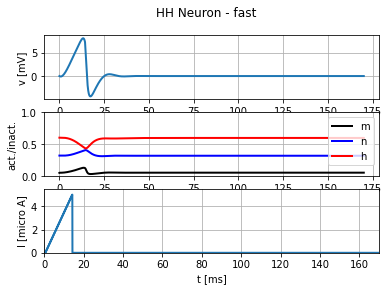

voltage_fast=0.007443206417119181


In [64]:
# Enter your code below

# Hint: change the unit time to 0.1ms to get a smooth ramp current. 

#########################
##   Q2.2.2a solution   ##
#########################

b2.defaultclock.dt = 0.02*b2.ms
fast_ramp_t_end = 142  # no spike. make it longer  -> voltage goes more than 10 times higher at 141
fast_ramp_current = input_factory.get_ramp_current(5, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 5*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 170 * b2.ms)
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
voltage_fast = state_monitor.vm[0,idx_t_end]
HH.plot_data(state_monitor, title="HH Neuron - fast")
print(f"voltage_fast={voltage_fast}")

###########################
##   Q2.2.2a conclusion   ##
###########################


# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A2.2.2a conclusion** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
    
</span>

In [23]:
#insert your code here

#########################
##   Q2.2.2b solution  ##
#########################



###########################
##   Q2.2.2b conclusion   ##
###########################


# Answer in green box below


<div class="alert alert-success">
<span style="color:black">
    
**A2.2.2b conclusion** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
    
    
</span>

### A2.2.3 Differences <a id="A2.2.3"/>
* [Go back to Q2.2.3](#Q2.2.3) 

In [24]:
# Enter your answer below

#########################
##   Q2.2.3 solution   ##
#########################

# Answer in green box below

<div class="alert alert-success">
<span style="color:black">
    
**A2.2.3 conclusion** 
    
\begin{tcolorbox}[colback=green!5]

Your answer here

\end{tcolorbox}
    
    
   
</span>

### A2.3 Rebound spike <a id="A2.3"/>
* [Go back to Q2.3](#Q2.3) 

In [25]:
# Enter your answer below

#######################
##   Q2.3 solution   ##
#######################



<div class="alert alert-success">
<span style="color:black">

**A2.3 conclusion** 
    
\begin{tcolorbox}[colback=green!5]
    
Your answer here

\end{tcolorbox}
    
</span>